In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
import warnings

In [2]:
df1=pd.read_csv("malicious_phish.csv")

In [3]:
df1.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
df1.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [6]:
df1.isnull().sum()

url     0
type    0
dtype: int64

In [7]:
df1['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [8]:
df1[df1['type']=='benign']

,url,type
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
...,...,...
603177,imetrica.net/css/,benign
603178,www.idxband.com/telin/images/e-online.php,benign
603179,www.coffeewithsophieinc.com/media/system/js/ca...,benign
603180,conseguircreditos.webs.tl/,benign


In [9]:
df=pd.concat([df1[df1['type']=='benign'],df1[df1['type']=='malware']])

In [10]:
df['type'].unique()

array(['benign', 'malware'], dtype=object)

<Axes: xlabel='type', ylabel='count'>

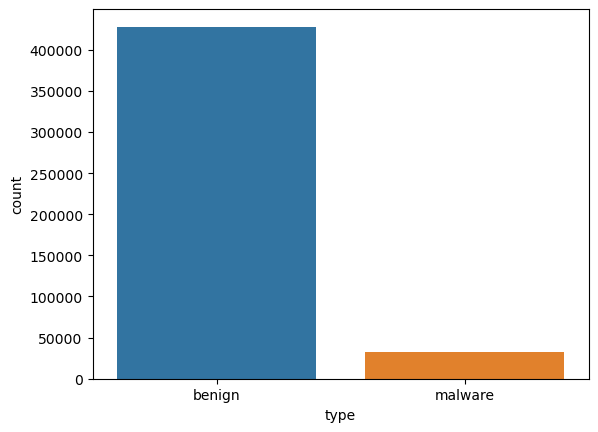

In [11]:
sns.countplot(x=df['type'])

In [12]:
df['count-https'] = [url.count('https://') for url in df['url']]
df['count-http'] = [url.count('http://') for url in df['url']]

In [13]:
df[df['count-http']==1]

,url,type,count-https,count-http
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,1
27,http://hollywoodlife.com/2014/05/01/rihanna-ih...,benign,0,1
49,http://interpark.com/displaycorner/FreeMarket....,benign,0,1
91,http://fanpage.gr/family/gineka/%ce%b1%cf%85%c...,benign,0,1
95,http://worldoftanks.ru/ru/content/guide/paymen...,benign,0,1
...,...,...,...,...
555181,http://211.137.225.95:47475/Mozi.m,malware,0,1
555182,http://115.55.246.246:44661/Mozi.m,malware,0,1
555183,http://219.155.142.211:55621/Mozi.m,malware,0,1
555184,http://42.238.164.8:48848/Mozi.m,malware,0,1


In [14]:
df[df['count-https']==1]

,url,type,count-https,count-http
129,https://twitter.com/home?status=%E3%83%8C%E3%8...,benign,1,0
491,https://medium.com/human-parts/the-laziest-com...,benign,1,0
772,https://hollywoodlife.com/2015/05/14/new-york-...,benign,1,0
1102,https://paytm.com/blog/vijay-shekahr-sharma-on...,benign,1,0
1317,https://twitter.com/share?text=%D0%A4%D0%BE%D1...,benign,1,0
...,...,...,...,...
555094,https://drive.google.com/uc?export=download&id...,malware,1,0
555118,https://onedrive.live.com/download?cid=9BEF332...,malware,1,0
555119,https://onedrive.live.com/download?cid=DD0A0EC...,malware,1,0
555120,https://onedrive.live.com/download?cid=CF0C6D1...,malware,1,0


In [15]:
df['url_length']=[len(url) for url in df['url']]

In [16]:
df[['url','url_length']]

,url,url_length
1,mp3raid.com/music/krizz_kaliko.html,35
2,bopsecrets.org/rexroth/cr/1.htm,31
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,118
6,espn.go.com/nba/player/_/id/3457/brandon-rush,45
7,yourbittorrent.com/?q=anthony-hamilton-soulife,46
...,...,...
555181,http://211.137.225.95:47475/Mozi.m,34
555182,http://115.55.246.246:44661/Mozi.m,34
555183,http://219.155.142.211:55621/Mozi.m,35
555184,http://42.238.164.8:48848/Mozi.m,32


In [17]:
df['count_@']=[url.count('@') for url in df['url']]

In [18]:
df[df['count_@']==2]

,url,type,count-https,count-http,url_length,count_@
19890,http://correios.com.br/english/the-brazil-post...,benign,0,1,165,2
41031,http://correios.com.br/english/the-brazil-post...,benign,0,1,165,2
48672,http://correios.com.br/english/the-brazil-post...,benign,0,1,165,2
50035,http://correios.com.br/para-sua-empresa/market...,benign,0,1,181,2
99760,http://correios.com.br/english/the-brazil-post...,benign,0,1,165,2
184218,http://correios.com.br/para-sua-empresa/market...,benign,0,1,181,2
208165,wortherkunft.de/~e/@_/@_-musik_.html,benign,0,0,36,2
214367,http://correios.com.br/sobre-correios/educacao...,benign,0,1,225,2
244083,shareyourstory.org/webx?230@@.ef2ff4d,benign,0,0,37,2
248900,http://correios.com.br/para-sua-empresa/market...,benign,0,1,156,2


In [19]:
df['is_exe']=[url.count('.exe') for url in df['url']]

In [20]:
df[df['is_exe']==1]

,url,type,count-https,count-http,url_length,count_@,is_exe
7438,my.execpc.com/~pjsports/SPORTSCASTER/1977-79%2...,benign,0,0,63,0,1
47435,economagic.com/em-cgi/data.exe/blsla/lauMT2624...,benign,0,0,50,0,1
63913,my.execpc.com/~sril/srillist,benign,0,0,28,0,1
117208,nepis.epa.gov/Exe/ZyNET.exe/910036OL.TXT?ZyAct...,benign,0,0,330,0,1
245217,news.radio-online.com/cgi-bin/rol.exe/headline...,benign,0,0,56,0,1
...,...,...,...,...,...,...,...
554998,http://tokyomangass.host/ticket.exe,malware,0,1,35,0,1
555028,http://allenservice.ga/~zadmin/test/svchost.exe,malware,0,1,47,0,1
555080,http://ghjfgvbxc.ru/32DWRrnLjJwlhd1.exe,malware,0,1,39,0,1
555081,http://ghjfgvbxc.ru/Unoxid1.exe,malware,0,1,31,0,1


In [21]:
df['count-digits']=[sum(1 for i in url if i.isdigit()) for url in df['url']]

In [22]:
df['count-digits']

1          1
2          1
5          1
6          4
7          0
          ..
555181    16
555182    16
555183    17
555184    14
555185    14
Name: count-digits, Length: 460623, dtype: int64

In [23]:
df['count-letters']=[sum(1 for i in url if i.isalpha()) for url in df['url']]

In [24]:
df['count-letters']

1         29
2         25
5         93
6         31
7         40
          ..
555181     9
555182     9
555183     9
555184     9
555185     9
Name: count-letters, Length: 460623, dtype: int64

In [25]:
df['count-dirs']=[url.count('/') for url in df['url']]

In [26]:
df[df['count-dirs']==1]

,url,type,count-https,count-http,url_length,count_@,is_exe,count-digits,count-letters,count-dirs
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,0,46,0,0,0,40,1
17,nugget.ca/ArticleDisplay.aspx?archive=true&e=1...,benign,0,0,52,0,0,7,38,1
25,songfacts.com/detail.php?id=13410,benign,0,0,33,0,0,5,23,1
34,vanderbilt.rivals.com/viewcoach.asp?coach=2079...,benign,0,0,64,0,0,9,45,1
36,movies.yahoo.com/shop?d=hv&cf=info&id=1800340831,benign,0,0,48,0,0,10,29,1
...,...,...,...,...,...,...,...,...,...,...
603160,off-system.net/paypal.com.html?=account=update...,benign,0,0,195,0,0,63,118,1
603161,signin.ebay.co.uk.ripleit.co.uk/identity.php?c...,benign,0,0,166,0,0,5,123,1
603164,naployi.com/,benign,0,0,12,0,0,0,10,1
603173,coolbeingsjp.abrahammellish.com/secure-nab.html,benign,0,0,47,0,0,0,42,1


In [27]:
x=df.drop(columns=['type','url'])
y=df['type']

In [28]:
x,y

(        count-https  count-http  url_length  count_@  is_exe  count-digits  \
 1                 0           0          35        0       0             1   
 2                 0           0          31        0       0             1   
 5                 0           1         118        0       0             1   
 6                 0           0          45        0       0             4   
 7                 0           0          46        0       0             0   
 ...             ...         ...         ...      ...     ...           ...   
 555181            0           1          34        0       0            16   
 555182            0           1          34        0       0            16   
 555183            0           1          35        0       0            17   
 555184            0           1          32        0       0            14   
 555185            0           1          32        0       0            14   
 
         count-letters  count-dirs  
 1           

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((322436, 8), (138187, 8), (322436,), (138187,))

In [31]:
X_train.head()

,count-https,count-http,url_length,count_@,is_exe,count-digits,count-letters,count-dirs
558376,0,0,13,0,0,0,11,1
548988,1,0,52,0,1,5,38,4
316958,0,0,61,0,0,7,46,3
240687,0,0,47,0,0,6,34,4
586562,0,0,417,0,0,170,219,3


In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
report_rf=classification_report(y_test, y_pred_rf,zero_division=1)
print("Random Forest:\n", report_rf)

Random Forest:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00    128242
     malware       0.99      0.98      0.98      9945

    accuracy                           1.00    138187
   macro avg       0.99      0.99      0.99    138187
weighted avg       1.00      1.00      1.00    138187



In [33]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
report_lr=classification_report(y_test, y_pred_lr, zero_division=1)
print("Logistic Regression:\n",report_lr)

Logistic Regression:
               precision    recall  f1-score   support

      benign       0.99      1.00      0.99    128242
     malware       0.94      0.81      0.87      9945

    accuracy                           0.98    138187
   macro avg       0.96      0.90      0.93    138187
weighted avg       0.98      0.98      0.98    138187



In [34]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
report_nb=classification_report(y_test, y_pred_nb, zero_division=1)
print("Naive Bayes:\n",report_nb)

Naive Bayes:
               precision    recall  f1-score   support

      benign       0.98      0.91      0.94    128242
     malware       0.39      0.73      0.51      9945

    accuracy                           0.90    138187
   macro avg       0.68      0.82      0.73    138187
weighted avg       0.93      0.90      0.91    138187



In [35]:
reports=[report_lr,report_nb,report_rf]

In [36]:
def parse_classification_report(report):
    lines=report.strip().split('\n')
    metrics={
        'accuracy':None,
        'benign_precision':None,
        'benign_recall':None,
        'benign_f1-score':None,
        'malware_precision':None,
        'malware_recall':None,
        'malware_f1-score':None,
        'macro_avg_precision':None,
        'macro_avg_recall':None,
        'macro_avg_f1-score':None,
        'weighted_avg_precision':None,
        'weighted_avg_recall':None,
        'weighted_avg_f1-score':None
    }
    for line in lines:
        if 'accuracy' in line:
            parts=line.split()
            metrics['accuracy']=float(parts[-2])
        elif 'benign' in line:
            parts=line.split()
            metrics['benign_precision']=float(parts[1])
            metrics['benign_recall']=float(parts[2])
            metrics['benign_f1-score']=float(parts[3])
        elif 'malware' in line:
            parts=line.split()
            metrics['malware_precision']=float(parts[1])
            metrics['malware_recall']=float(parts[2])
            metrics['malware_f1-score']=float(parts[3])
        elif 'macro avg' in line:
            parts=line.split()
            metrics['macro_avg_precision']=float(parts[2])
            metrics['macro_avg_recall']=float(parts[3])
            metrics['macro_avg_f1-score']=float(parts[4])
        elif 'weighted avg' in line:
            parts=line.split()
            metrics['weighted_avg_precision']=float(parts[2])
            metrics['weighted_avg_recall']=float(parts[3])
            metrics['weighted_avg_f1-score']=float(parts[4])
    return metrics
parsed_reports=[parse_classification_report(report) for report in reports]
for i, metrics in enumerate(parsed_reports):
    print(f"Report {i + 1} Metrics:")
    print(metrics)
    print()

Report 1 Metrics:
{'accuracy': 0.98, 'benign_precision': 0.99, 'benign_recall': 1.0, 'benign_f1-score': 0.99, 'malware_precision': 0.94, 'malware_recall': 0.81, 'malware_f1-score': 0.87, 'macro_avg_precision': 0.96, 'macro_avg_recall': 0.9, 'macro_avg_f1-score': 0.93, 'weighted_avg_precision': 0.98, 'weighted_avg_recall': 0.98, 'weighted_avg_f1-score': 0.98}

Report 2 Metrics:
{'accuracy': 0.9, 'benign_precision': 0.98, 'benign_recall': 0.91, 'benign_f1-score': 0.94, 'malware_precision': 0.39, 'malware_recall': 0.73, 'malware_f1-score': 0.51, 'macro_avg_precision': 0.68, 'macro_avg_recall': 0.82, 'macro_avg_f1-score': 0.73, 'weighted_avg_precision': 0.93, 'weighted_avg_recall': 0.9, 'weighted_avg_f1-score': 0.91}

Report 3 Metrics:
{'accuracy': 1.0, 'benign_precision': 1.0, 'benign_recall': 1.0, 'benign_f1-score': 1.0, 'malware_precision': 0.99, 'malware_recall': 0.98, 'malware_f1-score': 0.98, 'macro_avg_precision': 0.99, 'macro_avg_recall': 0.99, 'macro_avg_f1-score': 0.99, 'weighted

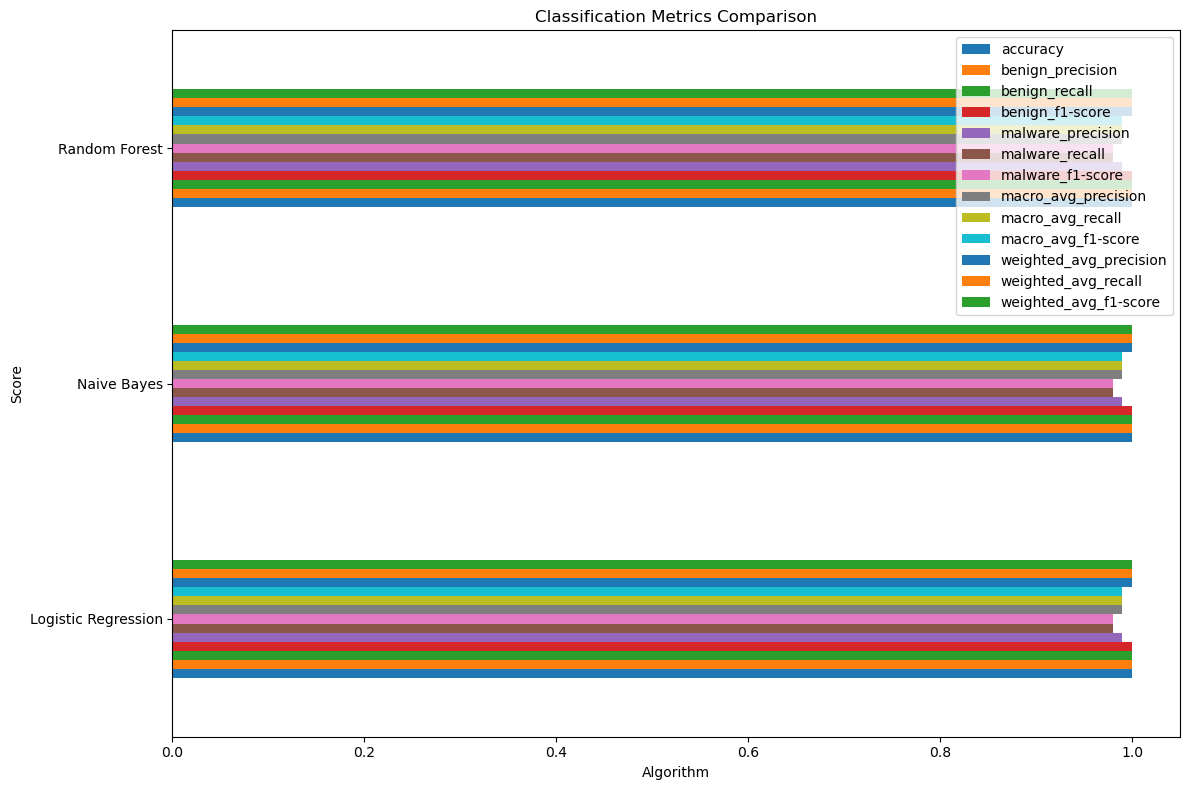

In [37]:
labels=['Logistic Regression','Naive Bayes','Random Forest']
df2=pd.DataFrame(metrics, index=labels)
df2.plot(kind='barh', figsize=(12, 8), rot=0)
plt.title('Classification Metrics Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# import pickle
# with open('Naive_Bayes.pkl', 'wb') as f:
#     pickle.dump(nb, f)

In [38]:
import joblib
loaded_model=joblib.load('Naive_Bayes.pkl')

In [39]:
url=input()

http://amazon.com


In [42]:
count_https=url.count('https://')
count_http=url.count('http://')
url_length=len(url)
count_sym=url.count('@')
is_exe=url.count('.exe')
count_digits=sum(1 for i in url if i.isdigit())
count_letters=sum(1 for i in url if i.isalpha())
count_dirs=url.count('/')
y_test=loaded_model.predict([[count_https,count_http,url_length,count_sym,is_exe,count_digits,count_letters,count_dirs]])
warnings.filterwarnings('ignore', message='X does not have valid feature names, but MultinomialNB was fitted with feature names')

In [43]:
y_test

array(['benign'], dtype='<U7')